# Probabilidad de ganar la ronda una vez plantada la bomba

Bibliotecas necesarias para la ejecución

In [1]:
import pyodbc 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Definición de parámetros para la conexión con la base de datos

In [2]:
conn_str_esea = (
    r'Driver={SQL Server};'
    r'Server=localhost\MSSQLSERVER01;'
    r'Database=csgo_esea;'
    r'Trusted_Connection=yes;'
    )
cnxn = pyodbc.connect(conn_str_esea)

Definición de query de obtención de datos

In [23]:
query_ct = "Select A.map,cast(100-100.0*[Victorias en A]/[Veces plantadas en A] as decimal(4,2)) '% Desactivar en A', cast(100-100.0*[Victorias en B]/[Veces plantadas en B] as decimal(4,2)) 'Desactivar en B' from Plantadas_A A join Plantadas_B B on A.map=B.map join Victorias_A C on A.map=C.map join Victorias_B D on A.map=D.map order by a.map"
query_t = "Select A.map,cast(100.0*[Victorias en A]/[Veces plantadas en A] as decimal(4,2)) '% Desactivar en A', cast(100.0*[Victorias en B]/[Veces plantadas en B] as decimal(4,2)) 'Desactivar en B' from Plantadas_A A join Plantadas_B B on A.map=B.map join Victorias_A C on A.map=C.map join Victorias_B D on A.map=D.map order by a.map"

Carga de datos en dataframes

In [24]:
data_ct = pd.read_sql_query(query_ct, cnxn)
data_t = pd.read_sql_query(query_t, cnxn)

In [25]:
data_ct
data_t

,map,% Desactivar en A,Desactivar en B
0,de_cache,76.12,77.38
1,de_cbble,75.56,86.38
2,de_dust2,79.16,80.32
3,de_inferno,80.44,80.29
4,de_mirage,77.52,74.91
5,de_nuke,79.71,70.59
6,de_overpass,77.31,75.85
7,de_train,81.42,58.85


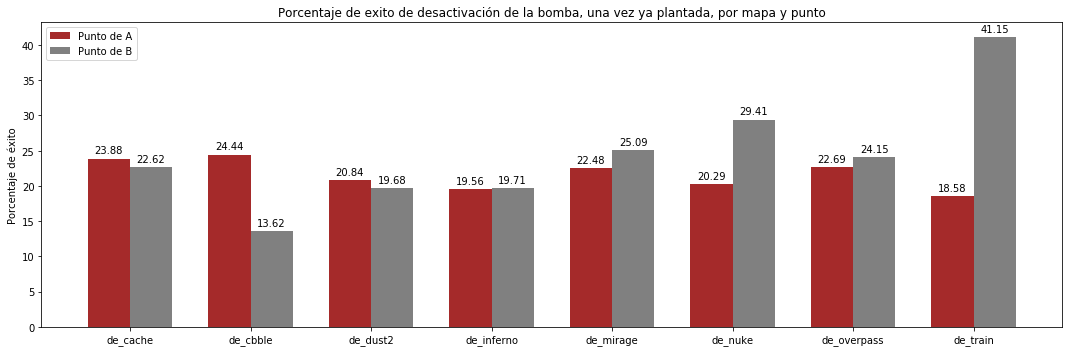

In [26]:
labels = data_ct['map']
A_means = data_ct['% Desactivar en A']
B_means = data_ct['Desactivar en B']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, A_means, width, label='Punto de A', color= 'brown')
rects2 = ax.bar(x + width/2, B_means, width, label='Punto de B', color= 'grey')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentaje de éxito')
ax.set_title('Porcentaje de exito de desactivación de la bomba, una vez ya plantada, por mapa y punto')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

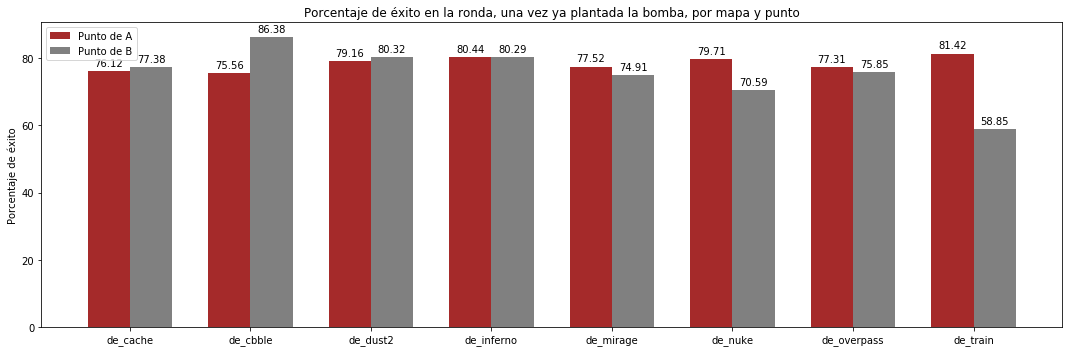

In [30]:
labels = data_t['map']
A_means = data_t['% Desactivar en A']
B_means = data_t['Desactivar en B']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, A_means, width, label='Punto de A', color= 'brown')
rects2 = ax.bar(x + width/2, B_means, width, label='Punto de B', color= 'grey')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentaje de éxito')
ax.set_title('Porcentaje de éxito en la ronda, una vez ya plantada la bomba, por mapa y punto')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()